# Chapter Two - Hands on Machine Learning...

Using the flowchart below, this notebook documents the process as noted in Chapter Two of **_Hands on Machine Learnign with Scikit-Learn, Keras and Tensorflow_**.

https://github.com/PatThompson1306/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb

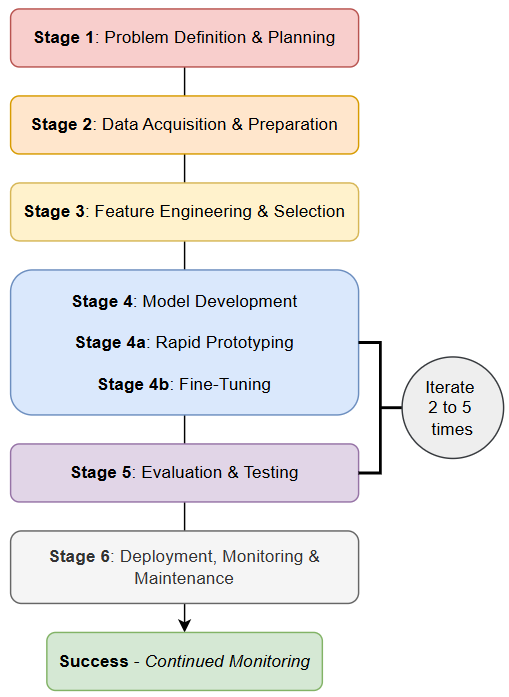

## Problem Definition & Planning

The book describes the requirement for a predictive model to provide media housing prices for a geographic area. 

The data set will come from a census data capture.

From this I can deduce that the task will likely be - 

**Supervised** - the data will be labelled

**A regression task** - using multiple features (multiple regression) the task is to provide a single value predictio (univariate regression)

**Batch learning** - the data is provided in oneset, there is no continuous update needed.

I need to understand a performance measure for how accurate any predictions my model makes will be.  For this I will used the **root mean square** method.

The root mean square error (RMSE) is a way to measure how wrong predictions are in a regression task.  Here's the simple breakdown:

1. Take each prediction error - For every data point, subtract your predicted value from the actual value
2. Square those errors - This makes all errors positive and punishes bigger errors more heavily
3. Find the average (mean) of those squared errors
4. Take the square root - This converts the result back to the same units as your original data

**Why it's useful:**

1. It tells you the typical size of your prediction errors in real-world units (GBP£, meters, etc.)
2. Bigger errors get penalised more heavily because of the squaring step
3. It's easy to interpret: if your RMSE is £10, your predictions are typically off by about £10

*Example: If you're predicting house prices and your RMSE is £15,000, this means your model's predictions are typically about £15,000 away from the actual prices. The lower your RMSE, the better your model is performing.*

## Data Aquisition and Preparation

In this instance, I have downloaded the data set for this task - 

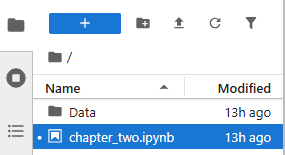

However it may be that it is preferable to write a script or function to do this automatically depending on where the data is.

In this instance however, I will read the data into a pandas dataframe and take a look at the first five rows

In [2]:
import pandas as pd
import numpy as np

data_path = "C:\\Users\\UserPC\\Desktop\\my_folder\\Learning alongside DProf\\Hands on Machine Learning (Book)\\Data\\housing.csv"
housing_data = pd.read_csv(data_path)


I will then look to have a quick look at the data to understand what it is made up of.

In [3]:
housing_data.info() # Get a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Here I can see that there are 10 columns (attributes) and in 9 of 10 cases 20,640 data points (total_bedrooms indicates only 20,433 data points)
I can also see tha all attributes are numerical (float64) aside from *ocean_proximity* which is an object -- because this data is from a .csv, it can only be text (string) data.
If I look at the *value_counts()* for ocean_proximity, I can see that it is clearly categorical text - it provides categories of where houses are in proximity to the ocean.

In [4]:
housing_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Calling the *describe()* shows us a summary of the numerical data attributes

In [5]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


A quick way to get a feel for the numeric data is to plot a histogram for each numeric value.

A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).

I can plot all in one go by calling the *hist()* method on the dataframe, but clearly a histogram of latitude or longitude is pointless, so creating a list of attributeds and plotting those is more meaningful.

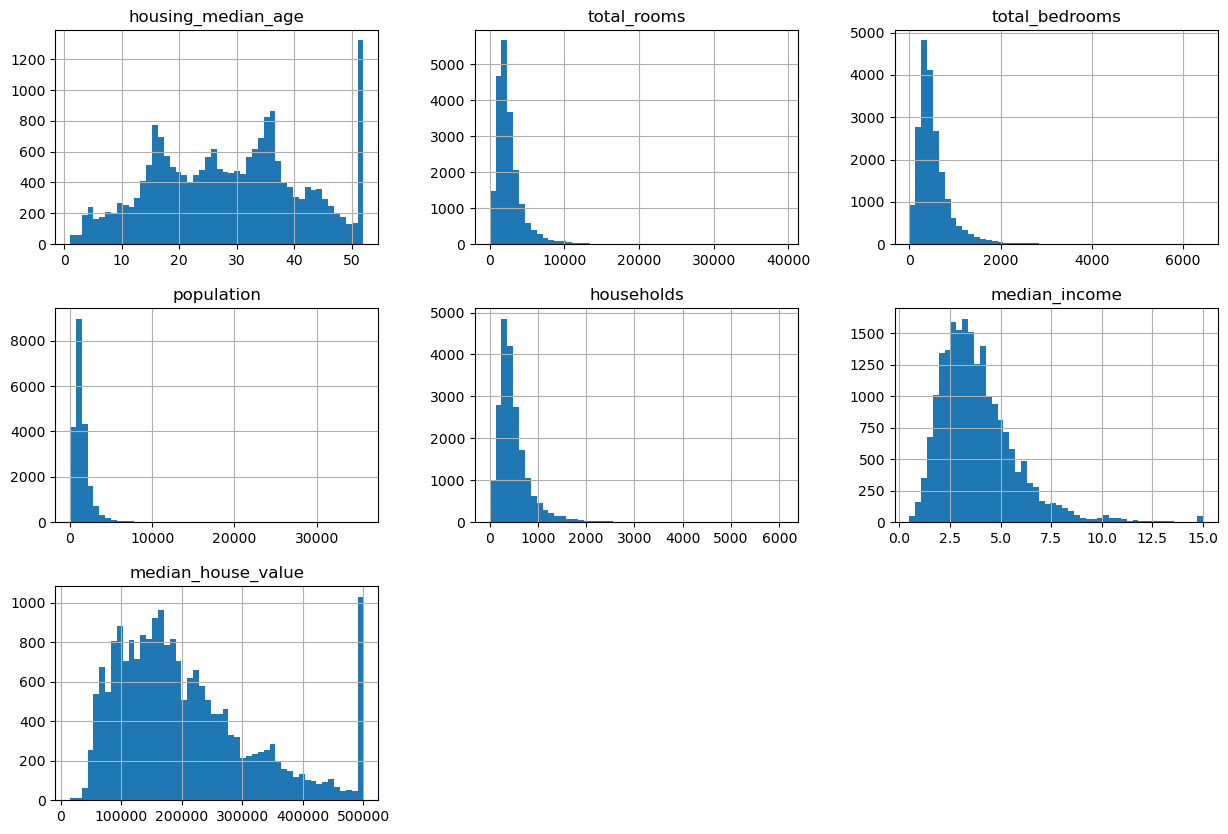

In [6]:
import matplotlib.pyplot as plt
attributes = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]
housing_data[attributes].hist(bins=50, figsize=(15, 10)) # divide the data into 50 bins for each histogram
plt.show()


Looking at these histograms shows a number of things.

1.  The *median_income* chart is not shown in currency amounts - this is because the data has been scaled with each point roughly equating to £10,000 (so 3 would be £30,000)

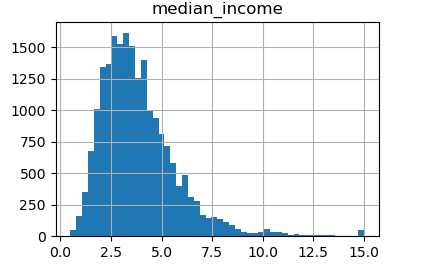

2. *housing_median_age* and *median_house_value* has also been capped.  In this regression task, *median_house_value* will be our target attribute (the one I will later try to predict), so having data capped at £50,000 (which essesntially means +> £50,000) is an issue as the learning may identify that no price is ever over £50,000

As I am still in **Stage 2**, it is crucial that I now separate out our test data from our trainign data - this is to prevent inadvertently detecting erroneous patterns or allowing bias to creep in.

Convention suggests a 20% split into the test data set and there are multiple ways of achieving this;

I can go for a predefined function like *train_test_split()* from the Scikit_Learn library

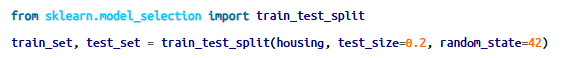

**however...**

I have been told that *median_income* is important and, becuase I have a relatively small data set I want to remove the potential for introducing a sampling bias.  If I were to use pure random sampling as seen above and apply it across this attribute, I would likely miss representative samples from the identified area.

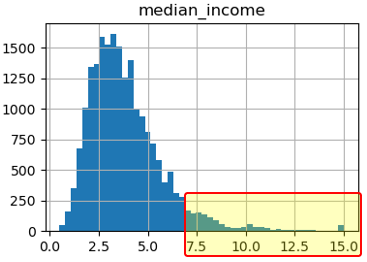

Accordingly, to get a non biased sample into our test data, I could consider creating a new attribute of *income_category* and stratifying income into groups.

Looking at the histogram, meiodan income is clustered around 1.5 to 6 (£15,000 to £60,000)... but some goes far higher and some lower.  

The **pd.cut()** function can be used to create income categories and to cut the  income values into 5 buckets:

1. Category 1: £0 - £15k
2. Category 2: £15k - £30k
3. Category 3: £30k - £45k

And so on...

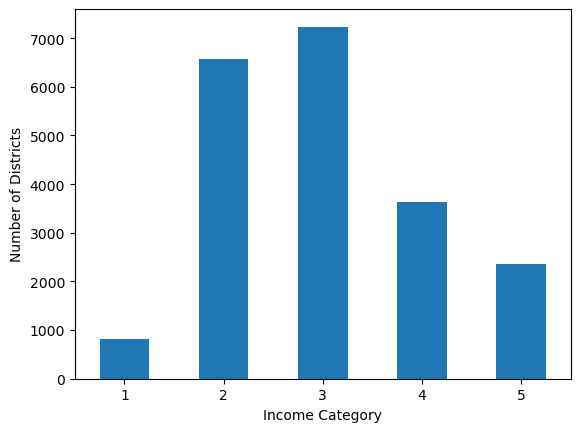

In [7]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels=[1, 2, 3, 4, 5])

housing_data["income_cat"].value_counts().sort_index().plot.bar(rot=0)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

Because I have evened out our sample, I am now in a good position to plit out data set into test and train sets.

This can be done usng the sklearn **train_test_split()** method.

In the example below I split 80% training, 20% testing.  I maintain **income_cat** proportions (hence the previous step) and I can reproduce by setting the **random_state**.

In [8]:
from sklearn.model_selection import train_test_split

training_data_set, testing_data_set = train_test_split(
    housing_data, test_size=0.2, stratify=housing_data["income_cat"], random_state=42) #perform stratified sampling using train_test_split

I can validate the stratiification by looking at the **income_cat** proportions in both the train and test data sets

In [9]:
training_data_set["income_cat"].value_counts() / len(training_data_set) 

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [10]:
testing_data_set["income_cat"].value_counts() / len(testing_data_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

I now know that our training and testing data sets are suitable for onward work.  I'm not going to use the **income_cat** attribute anymore, so I'm now going to drop it so that it does not inadvertently become a feature of any later ML process

In [11]:
for set in (training_data_set, testing_data_set):
    set.drop("income_cat", axis=1, inplace=True)

From this point, the **training_data_set** and the **testing_data_set** will be what I work with.

I will put the **testing_data_set** aside altogether at this point as I won't look at it again until needed.

I am going to be doing various transformations and visualistions of the **training_data_set** so , to ensure I don't inadvertently impact that data set, I'me going to make a copy

The concept of a log of data sets is worth considering here and will be presented once the copy is made.

In [12]:
copy_data = training_data_set.copy()
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


I now have four data sets.

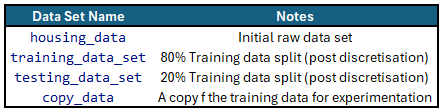

It is worth keeping this list of data sets to ensure I don't inadvertently get sidetracked and forget / misuse one or another set.

#### Visualisation of geographic data

I know the data contains Lat and Long values as the first two attributes and it would be good to see these visualised on a map with the **median_house_value**

In [13]:
import plotly.express as px # type: ignore

map = px.scatter_map(copy_data,
                    lat="latitude", # specify the latitude column
                    lon="longitude", # specify the longitude column
                    color="median_house_value", # color by median house value
                    size="population", # size by population
                    map_style="open-street-map", # use open street map style
                    zoom=4.5, # set initial zoom level
                    height=700) # set the height of the map
map.show()

This map gives an easy to understand visual indicating that the more expensive houses are sited closer to the coast line.  This common sense correlation can be noted via the lat/long variables when visualised geographically.

Other correlations can not be visualised as such and therefore may need a correlaton matrix.  The standard correlation matrix uses the *standard correlation coefficient (Spearman R)* to find the correlation between each attribute against a named attribute.

Below I have pulled out the numeric attributes (leaving lat / long and the categoric string attribute) and have then produced a correlation matrix of each against **median_house_value**

In [14]:
correlation_attributes = ["total_rooms", "total_bedrooms", "population", "households", "median_income", "housing_median_age", "median_house_value"]
correlation_matrix = copy_data[correlation_attributes].corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)



median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
Name: median_house_value, dtype: float64

It seems the obvious (and logical) predictor of where house prices are more expensive is where the population have a higher income.  This correlation can be visualised further...

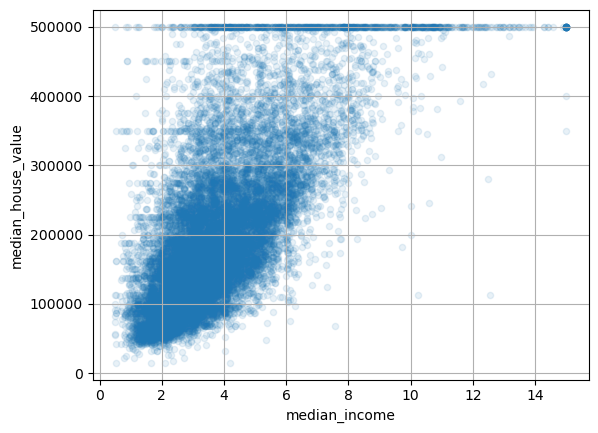

In [15]:
copy_data.plot(kind="scatter", 
               x="median_income", 
               y="median_house_value", 
               alpha=0.1,
               grid=True)
plt.show()

#### New attributes and correlations

It's entirely possible to make new attributes and then try those in a correlation matrix to see if there are other interesting elements to consider in future predictions.

For example;

1. The number of people in a house could be derived by dividing the population by the households.
2. The bedroom ratio across the housing stock could be derived by the total bedrooms by total rooms.
3. Rooms per house could be derived by total rooms by households.

In [16]:
copy_data["rooms_per_household"] = copy_data["total_rooms"] / copy_data["households"]
copy_data["population_per_household"] = copy_data["population"] / copy_data["households"]
copy_data["bedroom_ratio"] = copy_data["total_bedrooms"] / copy_data["total_rooms"]

correlation_attributes = ["median_house_value", "rooms_per_household", "population_per_household", "bedroom_ratio"]
correlation_matrix = copy_data[correlation_attributes].corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
rooms_per_household         0.143663
population_per_household   -0.038224
bedroom_ratio              -0.256397
Name: median_house_value, dtype: float64

It turns out the **rooms_per_household** attribute is more informative than the total rooms attribute in correlating house value.

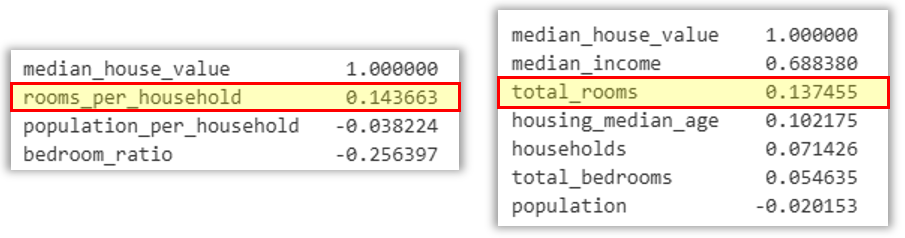

Cumulatively, the steps preceding this have been explorative.  They are included to gain insight and understanding and to provide high-level understanding of the data.

Once this is done (and it may become an iterative process repeated later), it's time to move onto preparing the data for some machine learning.

Initially I am going to open a fresh copy of the training data - at the same time I'm going to drop the exisiting predictors from the copy data.  These will be given their own dataframe.

The various data sets now look like - 

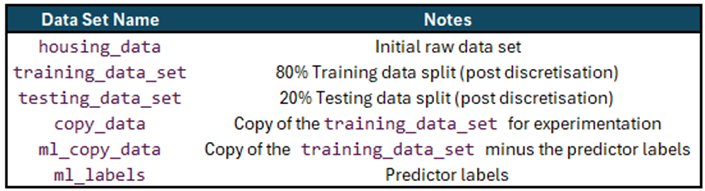

In [17]:
ml_copy_data = training_data_set.drop("median_house_value", axis=1)
ml_labels = training_data_set["median_house_value"].copy()

#### Cleaning the data

Most ML algorithms can not cope with missing values.

We know from earlier review that **total_bedrooms** is missing some values.

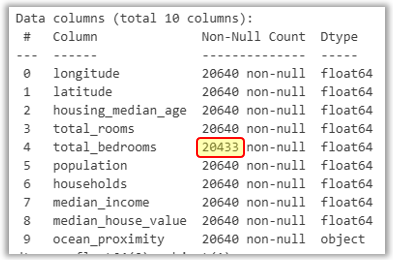

There are three methods to deal with this;

1. Remove the rows with the missing data - this will remove 207 rows (1% approx of the dataset)
2. Remove the whole attribute. (this will remove 2043 values and likely an important determinant of the predicted value!)
3. Impute a value into the missing data rows (given this will impute a calculated median for each feature - which will be largely accurate given the 99% data coverage) 

We will go with option 3 and create an instance of SKLearn's **Simple Imputer** to complete this task.

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Simple Imputer can only work on numeric data and we known that **ocean_proximity** is categorical and not a numeric attribute.
I therefore need to create a copy of the numeric data only to leverage the Simple Imputer.

In [22]:
ml_copy_data_numeric = ml_copy_data.select_dtypes(include=[np.number]) # select only numeric columns
imputer.fit(ml_copy_data_numeric) # compute the median of each attribute
X = imputer.transform(ml_copy_data_numeric) # replace missing values with the computed median (this is returned as a numpy array)
housing_training_numeric_final = pd.DataFrame(X, columns=ml_copy_data_numeric.columns, index=ml_copy_data_numeric.index) # convert the numpy array back to a DataFrame
housing_training_numeric_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


I've now got a complete numeric training data set.
I have to deal with the categoric colum **ocean_proximity**

In [24]:
ml_copy_data_categorial = ml_copy_data.select_dtypes(exclude=[np.number]) # select only categoric columns
ml_copy_data_categorial.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


I can use SKLean's **Ordinal Encoder** to achieve this.
First I need to creat an instance of the encoder.

In [28]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
ml_copy_data_categorial_encoded = onehot_encoder.fit_transform(ml_copy_data_categorial) # encode the categoric columns
ml_copy_data_categorial_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>